# Lineární regrese - pokračování

## 1. Cíl lekce
- Intuitivně pochopit **lineární regresi**
- **Vidět** jak funguje regrese pomocí vizualizací
- Pochopit **co znamená vysvětlená a nevysvětlená variabilita**
- Znát rovnici přímky a význam parametrů
- Umět spočítat pomocí sklearn
- Interpretovat rezidua, R² a další metriky

## 2. Co je lineární regrese?

### Intuitivní vysvětlení
Představte si, že máte body v grafu a chcete jimi **proložit nejlepší přímku**. To je lineární regrese!

**Příklad:** Chcete předpovědět známku studenta na základě hodin učení.
- Máte data o 5 studentech
- Každý student se učil různý počet hodin
- Každý dostal různou známku
- Hledáte přímku, která nejlépe popisuje vztah mezi hodinami a známkou

## 3. Rovnice přímky

### Základní tvar
$$y = \beta_0 + \beta_1 \cdot x + \epsilon$$

**Vysvětlení symbolů:**
- $y$ = závislá proměnná (to, co předpovídáme, např. známka)
- $x$ = nezávislá proměnná (to, z čeho předpovídáme, např. hodiny učení)
- $\beta_0$ = průsečík s osou y (řecké písmeno beta s indexem 0) - hodnota y když x=0
- $\beta_1$ = sklon přímky (řecké písmeno beta s indexem 1) - o kolik se změní y, když x vzroste o 1
- $\cdot$ = znak násobení
- $+$ = znak sčítání
- $\epsilon$ = chyba (řecké písmeno epsilon) - rozdíl mezi skutečností a přímkou

## 4. Příklad dat

Máme data o 5 studentech:

| Student | Hodiny učení | Známka (body) |
|---------|-------------|---------------|
| 1       | 1           | 52            |
| 2       | 2           | 58            |
| 3       | 3           | 65            |
| 4       | 4           | 72            |
| 5       | 5           | 78            |

**Pozorování:** Více hodin učení → vyšší známka

## 5. Metoda nejmenších čtverců (OLS)

### Princip
OLS (Ordinary Least Squares) hledá přímku, která **minimalizuje součet čtverců chyb**.

### Vzorec
$$\text{Minimalizovat: } \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

**Vysvětlení symbolů:**
- $\text{Minimalizovat}$ = najít nejmenší možnou hodnotu
- $\sum_{i=1}^{n}$ = součet přes všechna pozorování od prvního (i=1) do posledního (i=n)
- $n$ = celkový počet pozorování (zde 5 studentů)
- $y_i$ = skutečná hodnota i-tého pozorování (skutečná známka i-tého studenta)
- $\hat{y}_i$ = předpovězená hodnota i-tého pozorování (stříška ^ = předpověď z přímky)
- $(y_i - \hat{y}_i)$ = reziduum (chyba) i-tého pozorování
- $(...)^2$ = umocnění na druhou
- $i$ = index pozorování běžící od 1 do n

## 6. Výpočet parametrů β₀ a β₁

### Vzorec pro sklon (β₁)
$$\beta_1 = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n} (x_i - \bar{x})^2}$$

**Vysvětlení symbolů:**
- $\beta_1$ = sklon přímky (beta jedna)
- $\sum_{i=1}^{n}$ = součet přes všechna pozorování od i=1 do i=n
- $n$ = počet pozorování (5 studentů)
- $x_i$ = hodnota x i-tého pozorování (hodiny i-tého studenta)
- $\bar{x}$ = průměr všech x (čárka nad x = průměrný počet hodin)
- $y_i$ = hodnota y i-tého pozorování (známka i-tého studenta)
- $\bar{y}$ = průměr všech y (čárka nad y = průměrná známka)
- $(x_i - \bar{x})$ = odchylka x od průměru
- $(y_i - \bar{y})$ = odchylka y od průměru
- Zlomková čára = dělení (čitatel děleno jmenovatel)
- $i$ = index pozorování běžící od 1 do n

### Vzorec pro průsečík (β₀)
$$\beta_0 = \bar{y} - \beta_1 \cdot \bar{x}$$

**Vysvětlení symbolů:**
- $\beta_0$ = průsečík s osou y (beta nula)
- $\bar{y}$ = průměr všech y (průměrná známka)
- $\beta_1$ = sklon přímky (už vypočtený)
- $\cdot$ = násobení
- $\bar{x}$ = průměr všech x (průměrný počet hodin)
- $-$ = odčítání

## 7. Manuální výpočet parametrů

### Krok 1: Průměry
- $\bar{x} = \frac{1+2+3+4+5}{5} = 3$ hodin
- $\bar{y} = \frac{52+58+65+72+78}{5} = 65$ bodů

### Krok 2: Výpočet sklonu β₁

| i | $x_i$ | $y_i$ | $x_i - \bar{x}$ | $y_i - \bar{y}$ | $(x_i - \bar{x})(y_i - \bar{y})$ | $(x_i - \bar{x})^2$ |
|---|-------|-------|-----------------|-----------------|-----------------------------------|---------------------|
| 1 | 1     | 52    | -2              | -13             | 26                                | 4                   |
| 2 | 2     | 58    | -1              | -7              | 7                                 | 1                   |
| 3 | 3     | 65    | 0               | 0               | 0                                 | 0                   |
| 4 | 4     | 72    | 1               | 7               | 7                                 | 1                   |
| 5 | 5     | 78    | 2               | 13              | 26                                | 4                   |
| **Součet** | | |                 |                 | **66**                            | **10**              |

$\beta_1 = \frac{66}{10} = 6.6$

**Interpretace:** Za každou hodinu učení navíc vzroste známka o 6.6 bodů.

### Krok 3: Výpočet průsečíku β₀
$\beta_0 = 65 - 6.6 \times 3 = 65 - 19.8 = 45.2$

**Interpretace:** Základní známka (při 0 hodinách učení) je 45.2 bodů.

### Výsledná rovnice
$$\text{Známka} = 45.2 + 6.6 \times \text{Hodiny}$$

## 8. Průměr jako baseline model

### KLÍČOVÉ POCHOPENÍ: Průměr je také model!

Představte si, že vás někdo požádá: "Hádej, jakou známku dostal nějaký student."
- Nevíte, kolik se učil
- Nevíte o něm nic
- Co je nejlepší tip? **PRŮMĚR!**

**Průměr = Nejhloupější možný model**
- Říká všem stejnou hodnotu (65 bodů)
- Ignoruje všechny informace
- Ale je to pořád lepší než náhodné hádání!

## 9. Variabilita - TSS, ESS, RSS

### TSS (Total Sum of Squares) - Celková variabilita
$$TSS = \sum_{i=1}^{n} (y_i - \bar{y})^2$$

**Vysvětlení symbolů:**
- $TSS$ = Total Sum of Squares (celková variabilita)
- $\sum_{i=1}^{n}$ = součet od i=1 do i=n
- $n$ = počet pozorování (5)
- $y_i$ = skutečná hodnota i-tého pozorování
- $\bar{y}$ = průměr všech y (čárka nad y)
- $(y_i - \bar{y})^2$ = čtverec odchylky od průměru
- $i$ = index pozorování

**Interpretace:** Měří, jak moc se data liší od průměru.

### RSS (Residual Sum of Squares) - Nevysvětlená variabilita
$$RSS = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

**Vysvětlení symbolů:**
- $RSS$ = Residual Sum of Squares (nevysvětlená variabilita)
- $\sum_{i=1}^{n}$ = součet od i=1 do i=n
- $n$ = počet pozorování (5)
- $y_i$ = skutečná hodnota i-tého pozorování
- $\hat{y}_i$ = předpovězená hodnota i-tého pozorování (stříška = předpověď)
- $(y_i - \hat{y}_i)^2$ = čtverec rezidua (chyby)
- $i$ = index pozorování

**Interpretace:** Měří chyby modelu.

### ESS (Explained Sum of Squares) - Vysvětlená variabilita
$$ESS = \sum_{i=1}^{n} (\hat{y}_i - \bar{y})^2$$

**Vysvětlení symbolů:**
- $ESS$ = Explained Sum of Squares (vysvětlená variabilita)
- $\sum_{i=1}^{n}$ = součet od i=1 do i=n
- $n$ = počet pozorování (5)
- $\hat{y}_i$ = předpověď našeho modelu pro i-tého studenta (stříška = předpověď)
- $\bar{y}$ = průměr všech y (čárka nad y = předpověď baseline modelu)
- $(\hat{y}_i - \bar{y})$ = o kolik je náš model lepší než průměr
- $(...)^2$ = umocnění na druhou
- $i$ = index studenta běžící od 1 do n

**Interpretace:** Měří zlepšení oproti baseline modelu (průměru).

### Vztah mezi nimi
$$TSS = ESS + RSS$$

Celková variabilita = Vysvětlená + Nevysvětlená

## 10. Koeficient determinace R²

### Vzorec
$$R^2 = \frac{ESS}{TSS} = 1 - \frac{RSS}{TSS}$$

**Vysvětlení symbolů:**
- $R^2$ = koeficient determinace (R na druhou)
- $ESS$ = vysvětlená variabilita (Explained Sum of Squares)
- $TSS$ = celková variabilita (Total Sum of Squares)
- $RSS$ = nevysvětlená variabilita (Residual Sum of Squares)
- $\frac{ESS}{TSS}$ = podíl vysvětlené ku celkové (zlomek)
- $1$ = jednička
- $-$ = mínus
- $\frac{RSS}{TSS}$ = podíl nevysvětlené ku celkové

### Interpretace
- R² = 0.95 znamená, že model vysvětluje 95% variability v datech
- R² = 0.50 znamená, že model vysvětluje 50% variability v datech
- R² = 1.00 znamená perfektní fit (všechny body leží na přímce)
- R² = 0.00 znamená, že model není lepší než průměr

## 11. Import knihoven

Nyní, když rozumíme teorii, můžeme importovat knihovny pro praktické ukázky.

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Nastavení pro hezčí grafy
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 11

## 12. Příprava dat pro vizualizaci

In [2]:
# Data z příkladu
hodiny = np.array([1, 2, 3, 4, 5])
znamka = np.array([52, 58, 65, 72, 78])

## 13. Vizualizace dat

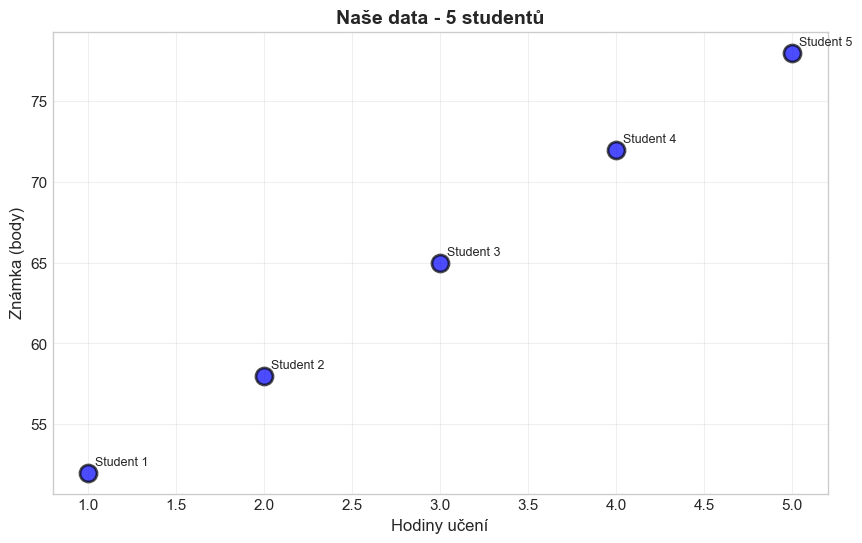

In [3]:
# Vizualizace bodů
plt.figure(figsize=(10, 6))
plt.scatter(hodiny, znamka, s=150, color='blue', alpha=0.7, edgecolor='black', linewidth=2)

# Popisky bodů
for i in range(len(hodiny)):
    plt.annotate(f'Student {i+1}', 
                xy=(hodiny[i], znamka[i]), 
                xytext=(5, 5), textcoords='offset points', fontsize=9)

plt.xlabel('Hodiny učení', fontsize=12)
plt.ylabel('Známka (body)', fontsize=12)
plt.title('Naše data - 5 studentů', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.show()

## 14. Výpočet lineární regrese pomocí sklearn

In [4]:
# Příprava dat pro sklearn
X = hodiny.reshape(-1, 1)  # Musí být 2D
y = znamka

# Vytvoření a trénování modelu
model = LinearRegression()
model.fit(X, y)

# Predikce
y_pred = model.predict(X)
y_mean = np.mean(y)

### Výsledky ze sklearn:
- **Sklon (β₁):** 6.6 bodů/hodinu
- **Průsečík (β₀):** 45.2 bodů
- **Rovnice:** Známka = 45.2 + 6.6 × Hodiny

## 15. Vizualizace regresní přímky

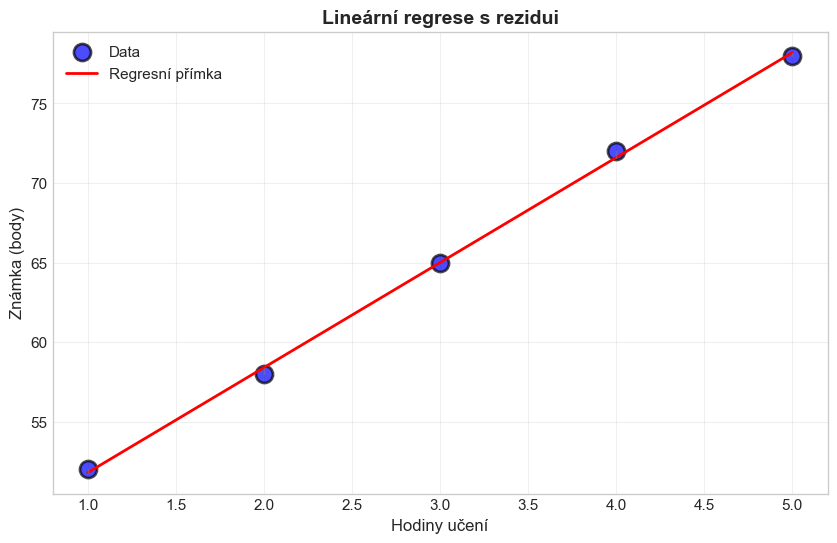

In [5]:
# Graf s regresní přímkou
plt.figure(figsize=(10, 6))
plt.scatter(hodiny, znamka, s=150, color='blue', alpha=0.7, edgecolor='black', linewidth=2, label='Data')
plt.plot(hodiny, y_pred, 'r-', linewidth=2, label='Regresní přímka')

# Rezidua
for i in range(len(hodiny)):
    plt.plot([hodiny[i], hodiny[i]], [znamka[i], y_pred[i]], 
             'gray', linewidth=1, alpha=0.5)

plt.xlabel('Hodiny učení', fontsize=12)
plt.ylabel('Známka (body)', fontsize=12)
plt.title('Lineární regrese s rezidui', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## 16. Vizualizace OLS - porovnání různých přímek

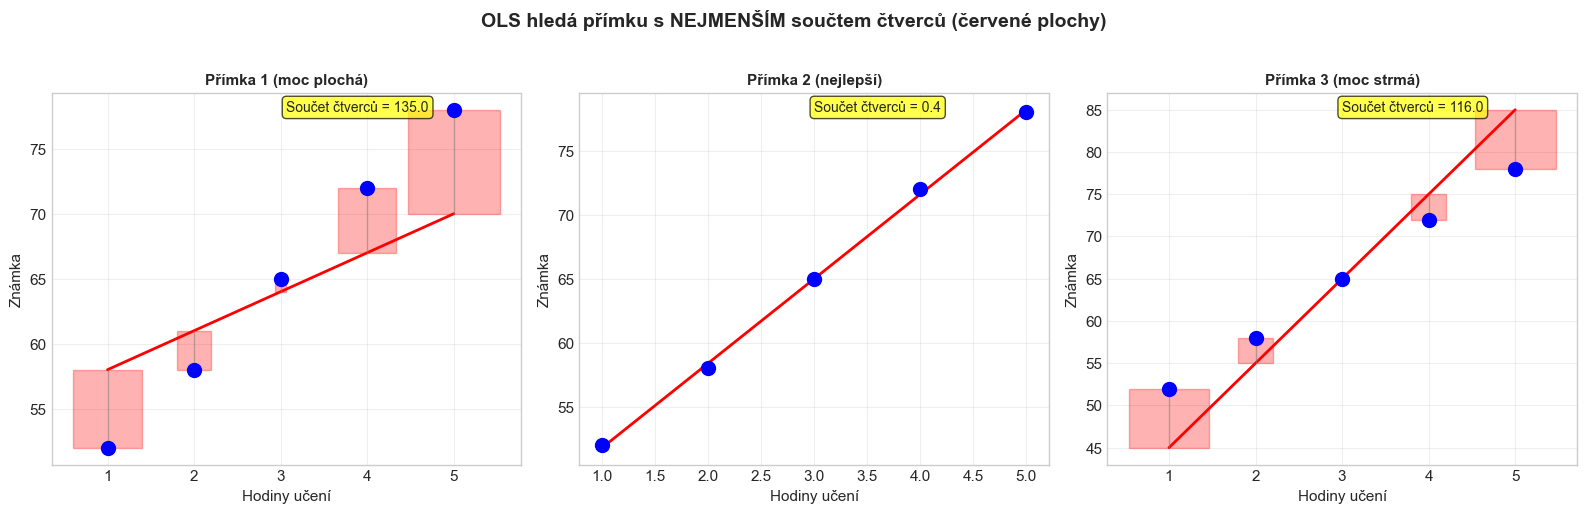

In [6]:
# Vizualizace OLS - porovnání 3 různých přímek
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Tři různé přímky
slopes = [3, 6.6, 10]  # Různé sklony
intercepts = [55, 45.2, 35]  # Různé průsečíky
titles = ['Přímka 1 (moc plochá)', 'Přímka 2 (nejlepší)', 'Přímka 3 (moc strmá)']

for idx, (ax, slope, intercept, title) in enumerate(zip(axes, slopes, intercepts, titles)):
    # Body
    ax.scatter(hodiny, znamka, s=100, color='blue', zorder=5)
    
    # Přímka
    y_test = intercept + slope * hodiny
    ax.plot(hodiny, y_test, 'r-', linewidth=2)
    
    # Rezidua jako čtverce
    sse = 0
    for i in range(len(hodiny)):
        # Vertikální čára
        ax.plot([hodiny[i], hodiny[i]], [znamka[i], y_test[i]], 
                'gray', linewidth=1, alpha=0.5)
        
        # Čtverec reprezentující kvadrát rezidua
        size = abs(znamka[i] - y_test[i])
        square = mpatches.Rectangle((hodiny[i] - size/15, min(znamka[i], y_test[i])),
                                   size/7.5, size,
                                   facecolor='red', alpha=0.3, edgecolor='red')
        ax.add_patch(square)
        sse += (znamka[i] - y_test[i])**2
    
    ax.set_xlabel('Hodiny učení', fontsize=11)
    ax.set_ylabel('Známka', fontsize=11)
    ax.set_title(title, fontsize=11, fontweight='bold')
    ax.text(0.5, 0.95, f'Součet čtverců = {sse:.1f}', 
            transform=ax.transAxes, fontsize=10,
            bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))
    ax.grid(True, alpha=0.3)

plt.suptitle('OLS hledá přímku s NEJMENŠÍM součtem čtverců (červené plochy)', 
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

## 17. Srovnání modelu s baseline (průměrem)

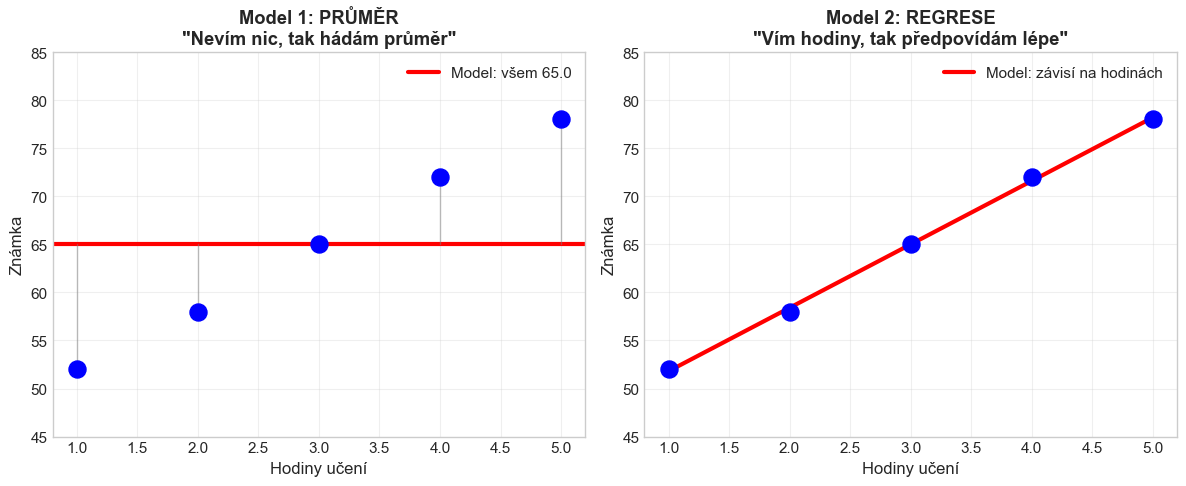

In [7]:
# Srovnání dvou modelů
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Model 1: Průměr (baseline)
ax1 = axes[0]
ax1.scatter(hodiny, znamka, s=150, color='blue', zorder=5)
ax1.axhline(y=y_mean, color='red', linewidth=3, label=f'Model: všem {y_mean:.1f}')
for i in range(len(hodiny)):
    ax1.plot([hodiny[i], hodiny[i]], [znamka[i], y_mean], 
             'gray', linewidth=1, alpha=0.5)
ax1.set_xlabel('Hodiny učení', fontsize=12)
ax1.set_ylabel('Známka', fontsize=12)
ax1.set_title('Model 1: PRŮMĚR\n"Nevím nic, tak hádám průměr"', fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.set_ylim(45, 85)

# Model 2: Lineární regrese
ax2 = axes[1]
ax2.scatter(hodiny, znamka, s=150, color='blue', zorder=5)
ax2.plot(hodiny, y_pred, 'red', linewidth=3, label='Model: závisí na hodinách')
for i in range(len(hodiny)):
    ax2.plot([hodiny[i], hodiny[i]], [znamka[i], y_pred[i]], 
             'gray', linewidth=1, alpha=0.5)
ax2.set_xlabel('Hodiny učení', fontsize=12)
ax2.set_ylabel('Známka', fontsize=12)
ax2.set_title('Model 2: REGRESE\n"Vím hodiny, tak předpovídám lépe"', fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.set_ylim(45, 85)

plt.tight_layout()
plt.show()

## 18. Vizualizace TSS, ESS, RSS

In [8]:
# Výpočet variability
TSS = np.sum((y - y_mean)**2)
RSS = np.sum((y - y_pred)**2)
ESS = np.sum((y_pred - y_mean)**2)

# Vizualizace všech tří typů variability
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Graf 1: TSS (celková variabilita)
ax1 = axes[0]
ax1.scatter(hodiny, znamka, s=100, color='blue', zorder=5)
ax1.axhline(y=y_mean, color='green', linestyle='--', linewidth=2, label=f'Průměr = {y_mean:.1f}')
for i in range(len(hodiny)):
    ax1.plot([hodiny[i], hodiny[i]], [znamka[i], y_mean], 'orange', linewidth=2, alpha=0.7)
    height = abs(znamka[i] - y_mean)
    rect = mpatches.Rectangle((hodiny[i]-0.15, min(znamka[i], y_mean)), 
                              0.3, height, facecolor='orange', alpha=0.2)
    ax1.add_patch(rect)
ax1.set_title(f'CELKOVÁ variabilita (TSS = {TSS:.1f})', fontsize=12, fontweight='bold')
ax1.set_xlabel('Hodiny')
ax1.set_ylabel('Známka')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Graf 2: RSS (nevysvětlená)
ax2 = axes[1]
ax2.scatter(hodiny, znamka, s=100, color='blue', zorder=5)
ax2.plot(hodiny, y_pred, 'red', linewidth=2, label='Regresní přímka')
for i in range(len(hodiny)):
    ax2.plot([hodiny[i], hodiny[i]], [znamka[i], y_pred[i]], 'purple', linewidth=2, alpha=0.7)
    height = abs(znamka[i] - y_pred[i])
    rect = mpatches.Rectangle((hodiny[i]-0.15, min(znamka[i], y_pred[i])), 
                              0.3, height, facecolor='purple', alpha=0.2)
    ax2.add_patch(rect)
ax2.set_title(f'NEVYSVĚTLENÁ (RSS = {RSS:.1f})', fontsize=12, fontweight='bold')
ax2.set_xlabel('Hodiny')
ax2.set_ylabel('Známka')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Graf 3: ESS (vysvětlená)
ax3 = axes[2]
ax3.plot(hodiny, y_pred, 'red', linewidth=2, label='Regresní přímka', zorder=3)
ax3.axhline(y=y_mean, color='green', linestyle='--', linewidth=2, label=f'Průměr = {y_mean:.1f}')
for i in range(len(hodiny)):
    ax3.plot([hodiny[i], hodiny[i]], [y_pred[i], y_mean], 'cyan', linewidth=2, alpha=0.7)
    height = abs(y_pred[i] - y_mean)
    rect = mpatches.Rectangle((hodiny[i]-0.15, min(y_pred[i], y_mean)), 
                              0.3, height, facecolor='cyan', alpha=0.2)
    ax3.add_patch(rect)
ax3.scatter(hodiny, y_pred, s=50, color='red', zorder=5, alpha=0.5)
ax3.set_title(f'VYSVĚTLENÁ (ESS = {ESS:.1f})', fontsize=12, fontweight='bold')
ax3.set_xlabel('Hodiny')
ax3.set_ylabel('Známka')
ax3.legend()
ax3.grid(True, alpha=0.3)

plt.suptitle('TSS = ESS + RSS (Celková = Vysvětlená + Nevysvětlená)', 
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

### Výsledky:
- **TSS:** 494.0 (celková variabilita dat)
- **ESS:** 484.0 (co model vysvětlil - zlepšení oproti průměru)
- **RSS:** 10.0 (co model nevysvětlil - chyby)
- **Kontrola:** TSS = ESS + RSS → 494.0 = 484.0 + 10.0 ✓

## 19. Výpočet a vizualizace R²

In [9]:
# Výpočet R²
r2_manual = 1 - (RSS / TSS)
r2_sklearn = model.score(X, y)

# Vizualizace R² jako progress bar
fig, ax = plt.subplots(figsize=(12, 3))

# Celkový bar
ax.barh(0, 100, height=0.5, color='lightgray', label='Celková variabilita (100%)')

# Vysvětlená část
ax.barh(0, r2_manual*100, height=0.5, color='green', label=f'Vysvětlená ({r2_manual*100:.1f}%)')

# Nevysvětlená část
ax.barh(0, (1-r2_manual)*100, height=0.5, left=r2_manual*100, 
        color='red', alpha=0.5, label=f'Nevysvětlená ({(1-r2_manual)*100:.1f}%)')

ax.set_xlim(0, 100)
ax.set_ylim(-0.5, 0.5)
ax.set_xlabel('Procento variability', fontsize=12)
ax.set_yticks([])
ax.set_title(f'R² = {r2_manual:.3f} (Model vysvětluje {r2_manual*100:.1f}% variability)', 
             fontsize=14, fontweight='bold')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3)

# Přidání popisků
ax.text(r2_manual*50, 0, f'{r2_manual*100:.1f}%', ha='center', va='center', 
        fontsize=14, fontweight='bold', color='white')
ax.text(r2_manual*100 + (1-r2_manual)*50, 0, f'{(1-r2_manual)*100:.1f}%', 
        ha='center', va='center', fontsize=14, fontweight='bold', color='white')

plt.tight_layout()
plt.show()

### Interpretace R²:
- **R² = 0.980**
- Model vysvětluje **98.0%** variability v datech
- Pouze **2.0%** zůstává nevysvětleno
- To znamená, že náš model je velmi dobrý!